This notebook is to analyse the clustering from MMseq (23022022) and generate the relevant sets.
The path to the full data is at:
/vol/ek/Home/orlyl02/working_dir/oligopred/clust_mmseq/2730328254095208960

In [ ]:
import os 
import os.path
import pandas as pd 
import numpy as np
import pickle 

from sklearn.model_selection import StratifiedGroupKFold 
from google.colab import drive
drive.mount("/content/drive", force_remount=True)


Mounted at /content/drive


In [ ]:
#########################################
*****************************************
# Before running this notebook we need to cluster the sequences
# This is done using MMseq2, installed on the lab computers

# prepare for the clustering:
#downoaded the new parsed_tab_for_embeds and did this in ipython3

import numpy as np; import pandas as pd; import sys;
parsed_tab_for_embed = pd.read_pickle("parsed_tab_for_embed.pkl")
parsed_tab_for_embed["stripped_fasta"] = parsed_tab_for_embed["fasta"].apply(lambda x: x.replace(' ',''))
parsed_tab_for_embed.drop_duplicates(subset=('pdb_code'))
parsed_tab_for_embed["code"].to_list()
tab_for_fasta = parsed_tab_for_embed[['code', 'stripped_fasta']]
with open("fastas_from_parsed_for_embed.fasta", "a") as f:
    for index, row in tab_for_fasta.iterrows():
        f.write(">"+row[0]+'\n')
        f.write(row[1]+'\n')


# Path:
# /vol/ek/share/bin/mmseqs/bin

# cmd:
# mmseqs easy-cluster /vol/ek/Home/orlyl02/working_dir/oligopred/clustering/fastas_from_parsed_for_embed.fasta session /vol/ek/Home/orlyl02/working_dir/oligopred/clust_mmseq --min-seq-id 0.3 -c 0.9 -s 8 --max-seqs 1000 --cluster-mode 1 > /vol/ek/Home/orlyl02/working_dir/oligopred/clust_mmseq/clust_mmseq.log



In [ ]:
#open the cluster file from the drive and rename the cols
cluster_tab = pd.read_csv("drive/MyDrive/OrlyPred/Homomer_embeds/results/embeds_Mar_22/clustering/cluster.tsv", sep='\t', header=None)
cluster_tab.rename(columns={0: "representative", 1: "code"}, inplace=True)
cluster_tab.drop_duplicates(subset=(["code"]), inplace=True)

In [ ]:
#open the table used for the embedding
with open("drive/MyDrive/OrlyPred/Homomer_embeds/results/embeds_Mar_22/parsed_tab_for_embed.pkl", 'rb') as f:
  full_tab_for_embed = pickle.load(f)
full_tab_for_embed

,code,nsub,QSBIO_err_prob,best_BU,homo,pdb_code,fasta
163180,5ahz_1,3.0,0.0,1.0,1.0,5ahz,A A A V R E N A L L S S S L W V N V A L A G I ...
102644,3q6m_1,6.0,0.0,1.0,1.0,3q6m,A A T K P I W T R N P D D I T N E E Y G E F Y ...
16398,1luq_1,4.0,0.0,1.0,1.0,1luq,A E A G I T G T W Y N Q L G S T F I V T A G A ...
108576,3t6f_1,4.0,0.0,1.0,1.0,3t6f,A E A G I T G T W Y N Q L G S T F I V T A G A ...
26678,1srf_1,4.0,0.0,1.0,1.0,1srf,A E A G I T G T W Y N Q L G S T F I V T A G A ...
...,...,...,...,...,...,...,...
161880,4zt1_1,2.0,14.3,1.0,1.0,4zt1,V I P P I S C P E N E K G P F P K N L V Q I K ...
117840,4a56_1,2.0,14.3,1.0,1.0,4a56,V S G Q A Q L E Q L A S V A A G A R Y L K N K ...
174177,5hap_1,2.0,14.3,1.0,1.0,5hap,W Q E N K S W N A H F T E H K S Q G V V V L W ...
152497,4s2l_1,2.0,14.3,1.0,1.0,4s2l,W Q E N K S W N A H F T E H K S Q G V V V L W ...


In [ ]:
full_tab_with_clusters = pd.merge(full_tab_for_embed, cluster_tab, on="code", how="outer")


In [ ]:
full_tab_with_clusters["representative"].nunique()

12078

nsub
1    11278
2      770
3       28
4        2
dtype: int64 different nsubs in cluster


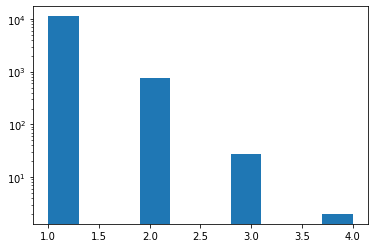

In [ ]:
print(full_tab_with_clusters.groupby("representative").nunique("nsub").groupby("nsub").size(), "different nsubs in cluster")
#show hist of nsubs per cluster
full_tab_with_clusters.groupby("representative").nunique("nsub")["nsub"].hist(grid=False, log=True, align="mid")

nsub
1    11278
2      770
3       28
4        2
dtype: int64 different nsubs in cluster


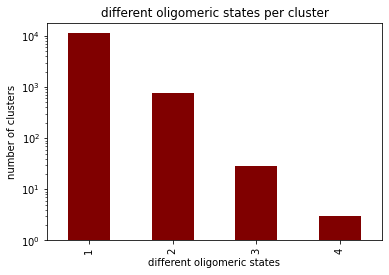

In [ ]:
print(full_tab_with_clusters.groupby("representative").nunique("nsub").groupby("nsub").size(), "different nsubs in cluster")

full_tab_with_clusters.groupby("representative").nunique("nsub").groupby("nsub").size().plot(kind='bar', grid=False, log=True, color="maroon", fontsize=10, title="different oligomeric states per cluster", xlabel="different oligomeric states", ylabel="number of clusters")


code
1      7674
2      1879
3       845
4       453
5       268
       ... 
194       1
218       1
240       1
242       1
350       1
Length: 76, dtype: int64 number of different pdb in each cluster


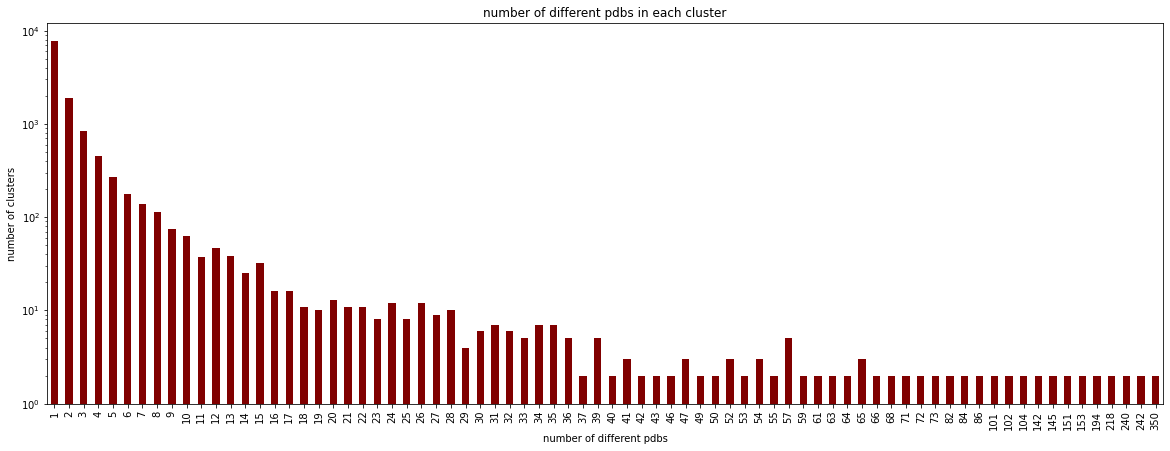

In [ ]:
print(full_tab_with_clusters.groupby("representative").nunique("code").groupby("code").size(), "number of different pdb in each cluster")

full_tab_with_clusters.groupby("representative").nunique("code").groupby("code").size().plot(kind='bar', color="maroon", figsize=[20,7], fontsize=10, log=True, title="number of different pdbs in each cluster", xlabel="number of different pdbs", ylabel="number of clusters")

code
1      7674
2      1879
3       845
4       453
5       268
       ... 
194       1
218       1
240       1
242       1
350       1
Length: 76, dtype: int64 number of different pdb in each cluster


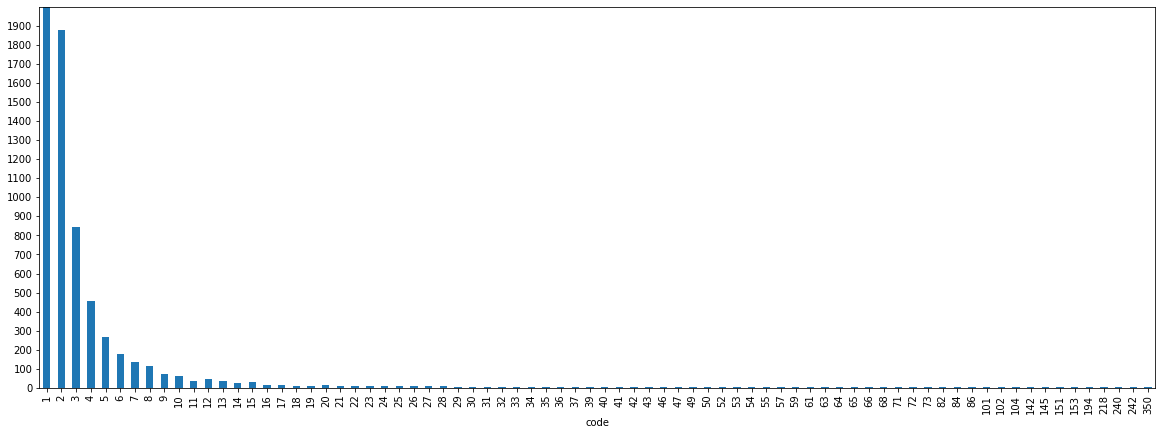

In [ ]:
print(full_tab_with_clusters.groupby("representative").nunique("code").groupby("code").size(), "number of different pdb in each cluster")

full_tab_with_clusters.groupby("representative").nunique("code").groupby("code").size().plot(kind='bar', figsize=[20,7], ylim=(0,2000), yticks = range(0, 2000, 100))

In [ ]:
print(full_tab_with_clusters.groupby("nsub").size().count(), "- number of different oligomeric assemblies")
full_tab_with_clusters.groupby("nsub").size().sort_values(ascending=False)

19 - number of different oligomeric assemblies


nsub
1.0     14954
2.0     10967
4.0      2937
3.0      1308
6.0       864
8.0       325
12.0      187
5.0       140
24.0      126
10.0      104
14.0       38
7.0        22
9.0         6
16.0        5
60.0        4
11.0        3
13.0        2
15.0        1
18.0        1
dtype: int64

In [ ]:
list_of_nsubs = list(set(full_tab_with_clusters["nsub"].tolist()))

In [ ]:
print("nsub", "num_of_clusts", "num_of_codes")
for nsub in list_of_nsubs:
  num_of_clusts = full_tab_with_clusters[full_tab_with_clusters['nsub'] == nsub].groupby("representative").nunique().shape[0]
  print(nsub, num_of_clusts, full_tab_with_clusters.groupby("nsub").size()[nsub])

nsub num_of_clusts num_of_codes
1.0 5817 14954
2.0 5250 10967
3.0 490 1308
4.0 718 2937
5.0 47 140
6.0 326 864
7.0 12 22
8.0 108 325
9.0 4 6
10.0 36 104
11.0 2 3
12.0 65 187
13.0 2 2
14.0 10 38
15.0 1 1
16.0 1 5
18.0 1 1
24.0 19 126
60.0 1 4


In [ ]:
full_tab_with_clusters["nsub"].describe()

count    31994.000000
mean         2.141151
std          2.251347
min          1.000000
25%          1.000000
50%          2.000000
75%          2.000000
max         60.000000
Name: nsub, dtype: float64

In [ ]:
X = full_tab_with_clusters["code"]
y = full_tab_with_clusters["nsub"]
groups = full_tab_with_clusters["representative"]
X

0        5ahz_1
1        3q6m_1
2        1luq_1
3        3t6f_1
4        1srf_1
          ...  
31989    4zt1_1
31990    4a56_1
31991    5hap_1
31992    4s2l_1
31993    5faq_1
Name: code, Length: 31994, dtype: object

In [ ]:
cv = StratifiedGroupKFold(n_splits=10)
train_lst = []
test_lst = []
for train_idxs, test_idxs in cv.split(X, y, groups):
    train_lst.append(X[train_idxs].tolist())
    test_lst.append(X[test_idxs].tolist())
    # print("TRAIN:", groups[train_idxs].index)
    # print("      ", X[train_idxs])
    # print(" TEST:", groups[test_idxs].index)
    # print("      ", X[test_idxs])
    print("train_lst", train_lst)
    print("test_lst", test_lst)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:880: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  UserWarning,
IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
train_idx_df = pd.DataFrame(train_lst).transpose()
train_idx_df.rename(columns={0:"train_0", 1:"train_1", 2:"train_2", 3:"train_3", 4:"train_4", 5:"train_5", 6:"train_6", 7:"train_7", 8:"train_8", 9:"train_9"}, inplace=True)
print(train_idx_df)
test_idx_df = pd.DataFrame(test_lst).transpose()
test_idx_df.rename(columns={0:"test_0", 1:"test_1", 2:"test_2", 3:"test_3", 4:"test_4", 5:"test_5", 6:"test_6", 7:"test_7", 8:"test_8", 9:"test_9"}, inplace=True)
print(test_idx_df)

      train_0 train_1 train_2 train_3 train_4 train_5 train_6 train_7 train_8  \
0      5ahz_1  5ahz_1  5ahz_1  5ahz_1  5ahz_1  5ahz_1  5ahz_1  3q6m_1  5ahz_1   
1      3q6m_1  3q6m_1  3q6m_1  3q6m_1  3q6m_1  3q6m_1  3q6m_1  1luq_1  3q6m_1   
2      1luq_1  1luq_1  1luq_1  1luq_1  1luq_1  1luq_1  4wog_1  3t6f_1  1luq_1   
3      3t6f_1  3t6f_1  3t6f_1  3t6f_1  3t6f_1  3t6f_1  4gda_1  1srf_1  3t6f_1   
4      1srf_1  1srf_1  1srf_1  1srf_1  1srf_1  1srf_1  1ort_1  1vwa_1  1srf_1   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
28823  4zt1_1  4a56_1    None    None    None    None    None    None    None   
28824  4a56_1  5hap_1    None    None    None    None    None    None    None   
28825  5hap_1  4s2l_1    None    None    None    None    None    None    None   
28826  4s2l_1  5faq_1    None    None    None    None    None    None    None   
28827  5faq_1    None    None    None    None    None    None    None    None   

      train_9  
0      5ahz

In [ ]:
merged_train_test = pd.concat([train_idx_df, test_idx_df], axis=1, join="outer")
merged_train_test

,train_0,train_1,train_2,train_3,train_4,train_5,train_6,train_7,train_8,train_9,test_0,test_1,test_2,test_3,test_4,test_5,test_6,test_7,test_8,test_9
0,5ahz_1,5ahz_1,5ahz_1,5ahz_1,5ahz_1,5ahz_1,5ahz_1,3q6m_1,5ahz_1,5ahz_1,2hfn_1,5afh_1,4wog_1,1ort_1,4gda_1,3a5v_1,1luq_1,5ahz_1,2p9j_1,3q6m_1
1,3q6m_1,3q6m_1,3q6m_1,3q6m_1,3q6m_1,3q6m_1,3q6m_1,1luq_1,3q6m_1,1luq_1,1b4b_1,5afm_1,1ldm_1,3wle_1,5a6q_1,4wrc_1,3t6f_1,5e4a_1,4r9w_1,4mt0_1
2,1luq_1,1luq_1,1luq_1,1luq_1,1luq_1,1luq_1,4wog_1,3t6f_1,1luq_1,3t6f_1,5fjd_1,5ig5_1,2fa8_1,3ull_1,4ut5_1,4wr9_1,1srf_1,5e4o_1,4zvx_1,5kzu_1
3,3t6f_1,3t6f_1,3t6f_1,3t6f_1,3t6f_1,3t6f_1,4gda_1,1srf_1,3t6f_1,1srf_1,3me1_1,4wcf_1,3lou_1,5tc3_1,1ovs_1,2dgk_1,1vwa_1,3cft_1,2v18_1,4bmw_1
4,1srf_1,1srf_1,1srf_1,1srf_1,1srf_1,1srf_1,1ort_1,1vwa_1,1srf_1,1vwa_1,2par_2,5lnv_1,4qhs_1,5iz1_1,4zlw_1,5j81_1,1mk5_1,5cr1_1,3pib_1,4zdj_1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28823,4zt1_1,4a56_1,None,None,None,None,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28824,4a56_1,5hap_1,None,None,None,None,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28825,5hap_1,4s2l_1,None,None,None,None,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28826,4s2l_1,5faq_1,None,None,None,None,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
full_tab_with_clusters

In [ ]:
#open the embeddings in order to add the to the table before splitting the data
with open("drive/MyDrive/OrlyPred/Homomer_embeds/results/embeds_Mar_22/embed_pkl_final_all","rb") as f:
    npy_embed_all = pickle.load(f)
filt_npy_embed_all = npy_embed_all[1:]

In [ ]:
# Add the embeddings to the codes and fastas table
# this option still adds a digit to the display but seems like a good way to go
full_tab_with_clusters['embeddings'] = list(filt_npy_embed_all.astype("float32"))

#consider the round - does this change the number or just the display? (probably the number, hence not used)

# full_tab_with_clusters['embeddings'] = list(filt_npy_embed_all.round(8))

In [ ]:
train_set = full_tab_with_clusters[full_tab_with_clusters["code"].isin(merged_train_test["train_0"])]
hold_out_set = full_tab_with_clusters[full_tab_with_clusters["code"].isin(merged_train_test["test_0"])]

In [ ]:
with open(("drive/MyDrive/OrlyPred/Homomer_embeds/results/embeds_Mar_22/hold_out_set.pkl"), 'wb') as f:
    pickle.dump(hold_out_set, f)

with open(("drive/MyDrive/OrlyPred/Homomer_embeds/results/embeds_Mar_22/train_set.pkl"), 'wb') as f:
    pickle.dump(train_set, f)
